=== Newton-Raphson Performance Comparison ===
CPU Root: 0.86909773 | Time: 0.000157 s
GPU Root: 0.86909773 | Time: 0.036291 s


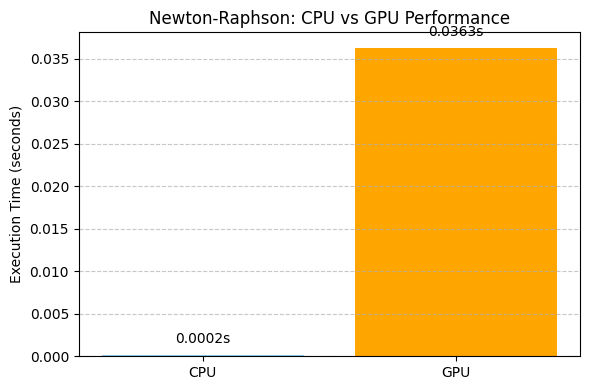

In [17]:
import time
import numpy as np
import matplotlib.pyplot as plt
from GPUPy.src.numerical_methods.root_finding import newton_raphson

def func(x):
    return np.sin(x) + np.sin(5 * x) + np.sin(10 * x) - 0.5

def d_func(x):
    return np.cos(x) + 5 * np.cos(5 * x) + 10 * np.cos(10 * x)

def benchmark_newton():
    print("=== Newton-Raphson Performance Comparison ===")
    x0 = 1.0
    tol = 1e-6
    max_iter = 100

    # CPU Benchmark
    start_cpu = time.perf_counter()
    root_cpu = newton_raphson(func, d_func, x0, tol, max_iter, use_gpu=False)
    cpu_time = time.perf_counter() - start_cpu

    # GPU Benchmark
    start_gpu = time.perf_counter()
    root_gpu = newton_raphson(func, d_func, x0, tol, max_iter, use_gpu=True)
    gpu_time = time.perf_counter() - start_gpu

    # Print Results
    print(f"CPU Root: {root_cpu:.8f} | Time: {cpu_time:.6f} s")
    print(f"GPU Root: {root_gpu:.8f} | Time: {gpu_time:.6f} s")

    # Plotting
    methods = ['CPU', 'GPU']
    times = [cpu_time, gpu_time]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(methods, times, color=['skyblue', 'orange'])
    plt.ylabel('Execution Time (seconds)')
    plt.title('Newton-Raphson: CPU vs GPU Performance')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars with timing
    for bar, t in zip(bars, times):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001,
                 f"{t:.4f}s", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    benchmark_newton()
